In [3]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels_res import *
from alvra_tools import errfunc

In [2]:
scan_name ="monoscan_004"

DIR = "/sf/alvra/data/p17807/res/scan_data/" + scan_name + "/"
DIR_json = "/sf/alvra/data/p17807/res/scan_info/"

In [5]:
json_file = DIR_json + scan_name + "_scan_info.json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

Signal = []
err_Signal = []

Izero = []
err_Izero = []

Energy_eV = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])
    print (filename)
    exists = os.path.isfile(filename)
    if exists:
        print("step", i+1, "of",numFiles, f": Processing {filename}")
        (data_shot, Izero_shot, energy_shot, pulseIDs) = load_FEL_scans(filename, channel_energy)
        Signal.append(data_shot.mean())
        err_Signal.append(data_shot.std()/np.sqrt(data_shot.size))
                
        Izero.append(Izero_shot.mean())
        err_Izero.append(Izero_shot.std()/np.sqrt(Izero_shot.size))
    
        energy_shot = [x for x in energy_shot if (np.abs(x) > 0)]
        Energy_eV.append(energy_shot[-1])
    #Position_mm.append(position_loop[0])
    
Signal = np.asarray(Signal)
err_Signal = np.asarray(err_Signal)

Izero = np.asarray(Izero)
err_Izero = np.asarray(err_Izero)

Energy_eV = np.asarray(Energy_eV)
print ("Job done!")

/sf/alvra/data/p17805/res/scan_info/monoscan_004_scan_info.json
Processing 51 files
/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0000.h5
step 1 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0000.h5
/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0001.h5
step 2 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0001.h5
/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0002.h5
step 3 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0002.h5
/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0003.h5
step 4 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0003.h5
/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0004.h5
step 5 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0004.h5
/sf/alvra/data/p17805/res/scan_data/monoscan_0

/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0048.h5
step 49 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0048.h5
/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0049.h5
step 50 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0049.h5
/sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0050.h5
step 51 of 51 : Processing /sf/alvra/data/p17805/res/scan_data/monoscan_004/monoscan_004_step0050.h5
Job done!


In [6]:
#Normalization

Signal_norm = Signal / Izero
err_Signal_norm = err_Signal / Izero

<IPython.core.display.Javascript object>


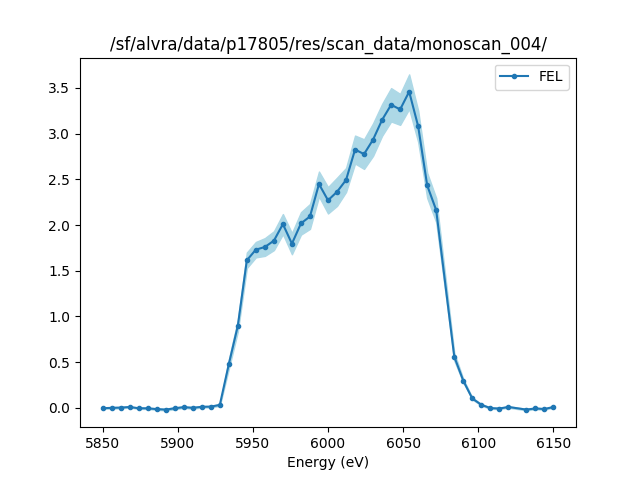

In [7]:
plt.figure()

plt.plot(Energy_eV, Signal_norm, label="FEL",marker='.')
low_err= Signal_norm - err_Signal_norm
high_err= Signal_norm + err_Signal_norm


plt.fill_between(Energy_eV, low_err, high_err, color='lightblue')
plt.title(DIR)
plt.xlabel("Energy (eV)")
plt.legend(loc="best")


plt.show()
#plt.savefig('Timescan_7_diode')